# Carga de librerias y datos

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 7.6 MB/s eta 0:00:00


In [4]:
!apt install tesseract-ocr
!apt install tesseract-ocr-spa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-spa all 1:4.00~git30-7274cfa-1.1 [951 kB]
Fetched 951 kB in 1s (704 kB/s)
Selecting previously unselected package tesseract-ocr-spa.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-spa_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-spa (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-sp

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests
import fitz
from PIL import Image
import io
import cv2
import pytesseract
import pdfplumber
import re

# Gráfico Diferencia Esperanza de Vida: España y Francia

In [6]:
df = pd.read_csv("https://ourworldindata.org/grapher/difference-in-female-and-male-life-expectancy-at-birth.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/difference-in-female-and-male-life-expectancy-at-birth.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# España

In [7]:
spain_df = df.loc[df["Entity"]=="Spain"]
spain_df.head()

,Entity,Code,Year,life_expectancy_fm_diff__age_0__type_period
17558,Spain,ESP,1908,1.849999
17559,Spain,ESP,1909,2.150002
17560,Spain,ESP,1910,2.310001
17561,Spain,ESP,1911,1.910000
17562,Spain,ESP,1912,1.869999


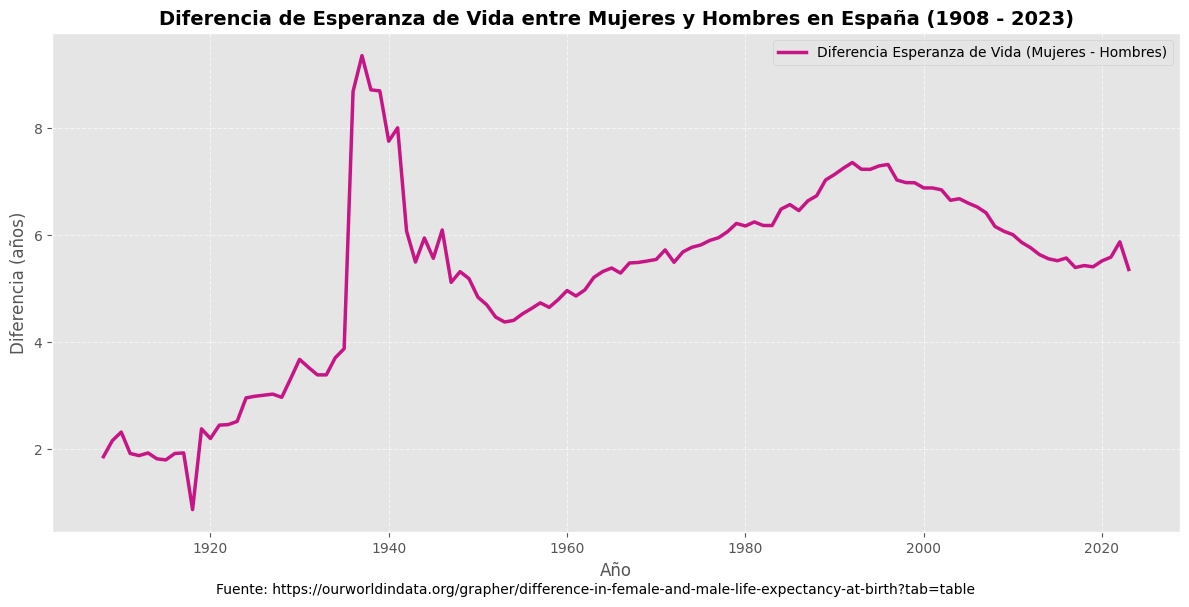

In [8]:
# Estilo general
plt.style.use('ggplot')  # Puedes probar también con 'ggplot', 'seaborn-darkgrid', etc.

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar con estilo
ax.plot(spain_df["Year"],
        spain_df["life_expectancy_fm_diff__age_0__type_period"],
        color="mediumvioletred",           # Color llamativo
        linewidth=2.5,                      # Grosor de línea
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=2,
        label="Diferencia Esperanza de Vida (Mujeres - Hombres)")

# Títulos y etiquetas
ax.set_title("Diferencia de Esperanza de Vida entre Mujeres y Hombres en España (1908 - 2023)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Diferencia (años)", fontsize=12)
plt.figtext(0.5, 0.001, 'Fuente: https://ourworldindata.org/grapher/difference-in-female-and-male-life-expectancy-at-birth?tab=table', ha='center', fontsize=10)

# Grid y leyenda
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc="best")

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("spain_life_expectancy_1908_2023.png", dpi = 300)
plt.show()

# Francia

In [9]:
france_df = df[df["Entity"] == "France"]
france_df.head()

,Entity,Code,Year,life_expectancy_fm_diff__age_0__type_period
6088,France,FRA,1816,2.039997
6089,France,FRA,1817,1.979999
6090,France,FRA,1818,0.980000
6091,France,FRA,1819,1.189999
6092,France,FRA,1820,1.360001


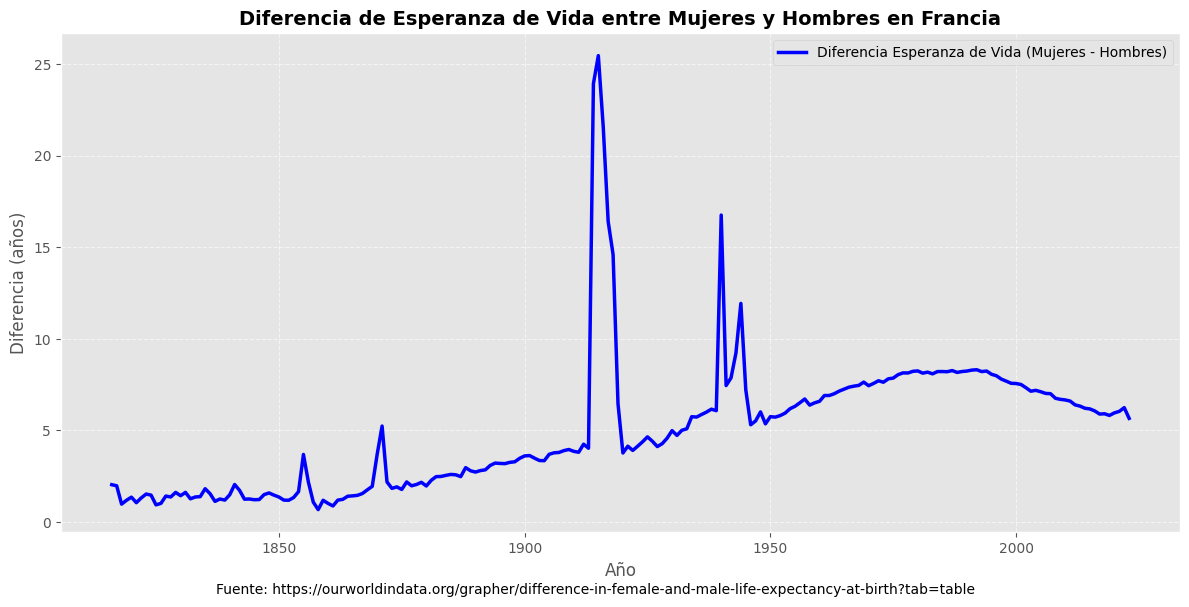

In [10]:
# Estilo general
plt.style.use('ggplot')  # Puedes probar también con 'ggplot', 'seaborn-darkgrid', etc.

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar con estilo
ax.plot(france_df["Year"],
        france_df["life_expectancy_fm_diff__age_0__type_period"],
        color="blue",           # Color llamativo
        linewidth=2.5,                      # Grosor de línea
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=2,
        label="Diferencia Esperanza de Vida (Mujeres - Hombres)")

# Títulos y etiquetas
ax.set_title("Diferencia de Esperanza de Vida entre Mujeres y Hombres en Francia", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Diferencia (años)", fontsize=12)
plt.figtext(0.5, 0.001, 'Fuente: https://ourworldindata.org/grapher/difference-in-female-and-male-life-expectancy-at-birth?tab=table', ha='center', fontsize=10)

# Grid y leyenda
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc="best")

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("france_life_expectancy.png", dpi = 300)
plt.show()

# Turquía

In [11]:
url = "https://dergipark.org.tr/tr/download/article-file/1544768"

response = requests.get(url)
pdf_data = response.content
response.raise_for_status()

doc = fitz.open(stream=pdf_data, filetype="pdf")

page = doc.load_page(6)

pix = page.get_pixmap(dpi=300)

img = Image.open(io.BytesIO(pix.tobytes()))

crop_area = (100, 300, 1800, 1790)
cropped_img = img.crop(crop_area)

cropped_img.save("tabla.png")

print("¡Imagen guardada como 'tabla.png'!")

¡Imagen guardada como 'tabla.png'!


In [12]:
def image_to_text(input_path, lang):
   """
   Función para leer una imagen y convertirla a texto.
   """
   img = cv2.imread(input_path)
   text = pytesseract.image_to_string(img,lang)

   return text.strip()

In [13]:
easy_text_path2 = "./tabla.png"
extracted_text = image_to_text(easy_text_path2,'eng')
#print(extracted_text)

In [14]:
cleaned_text = extracted_text.replace('|', '')

In [15]:
#print (cleaned_text)

In [16]:
# cleaned_text ya debe estar limpio de barras, etc.

lines = cleaned_text.strip().split('\n')

rows = []
for line in lines:
    parts = line.strip().split()

    # Verificar si la primera parte es un número (el año)
    if parts and parts[0].isdigit():
        if len(parts) >= 6:
            year = int(parts[0])
            woman_mean_age = float(parts[2])
            man_mean_age = float(parts[5])
            rows.append((year, woman_mean_age, man_mean_age))
# Crear DataFrame
df_old_turkey = pd.DataFrame(rows, columns=["Año", "Edad_Media_Mujeres", "Edad_Media_Hombres"])

# Mostrar resultado
print(df_old_turkey)

     Año  Edad_Media_Mujeres  Edad_Media_Hombres
0   1920                20.0                21.1
1   1925                21.7                22.7
2   1930                23.5                24.4
3   1935                25.4                26.2
4   1940                27.5                28.2
5   1945                28.6                29.2
6   1950                31.6                32.0
7   1955                34.8                34.9
8   1960                38.3                38.2
9   1965                42.3                41.8
10  1970                46.1                45.2
11  1975                48.3                47.1
12  1980                51.5                49.9
13  1985                56.8                54.5
14  1990                62.1                59.0
15  1995                67.9                64.0
16  2000                71.3                67.3
17  2005                76.0                71.3
18  2010                78.8                74.8
19  2015            

In [17]:
df_old_turkey["diff"] = df_old_turkey["Edad_Media_Mujeres"] - df_old_turkey["Edad_Media_Hombres"]
df_1950 = df_old_turkey[df_old_turkey["Año"]<1950]

In [18]:
turkey_df = df.loc[df["Entity"]=="Turkey"]
turkey_df.head()

,Entity,Code,Year,life_expectancy_fm_diff__age_0__type_period
19057,Turkey,TUR,1950,6.181000
19058,Turkey,TUR,1951,6.061401
19059,Turkey,TUR,1952,6.059399
19060,Turkey,TUR,1953,5.800003
19061,Turkey,TUR,1954,5.854202


In [19]:
df_1950_mod = df_1950.copy()
df_1950_mod['Entity'] = 'Turkey'
df_1950_mod['Code'] = 'TUR'
df_1950_mod['Year'] = df_1950_mod['Año']
df_1950_mod['life_expectancy_fm_diff__age_0__type_period'] = df_1950_mod['diff']


df_1950_mod = df_1950_mod[['Entity', 'Code', 'Year', 'life_expectancy_fm_diff__age_0__type_period']]
merged_df = pd.concat([df_1950_mod, turkey_df], ignore_index=True)
merged_df = merged_df.sort_values(by='Year').reset_index(drop=True)

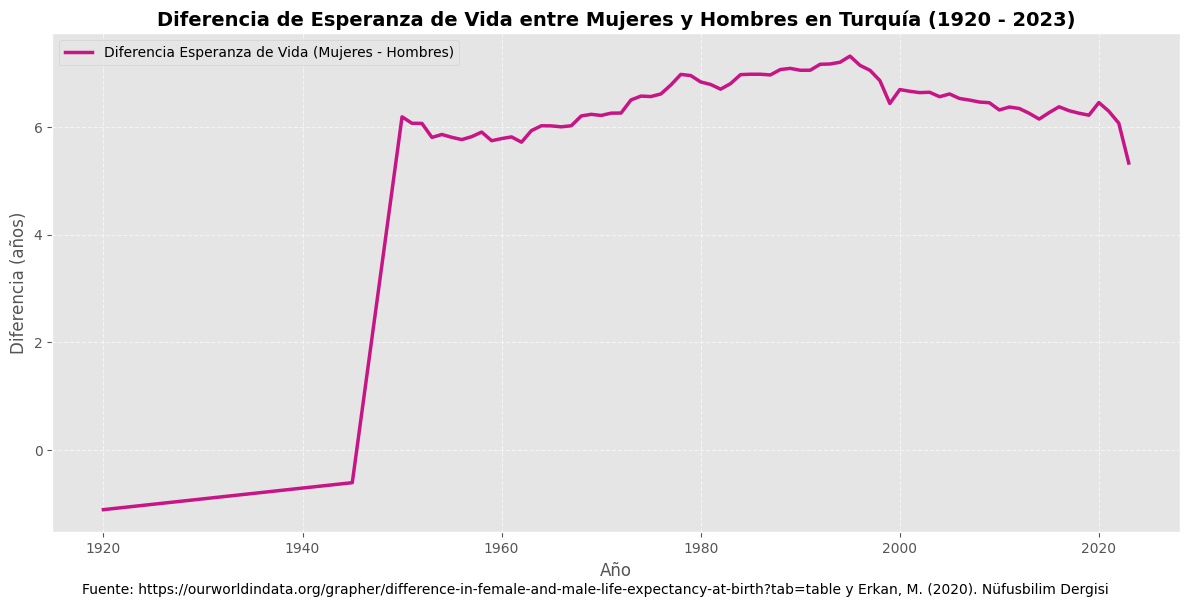

In [20]:
# Estilo general
plt.style.use('ggplot')  # Puedes probar también con 'ggplot', 'seaborn-darkgrid', etc.

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar con estilo
ax.plot(merged_df["Year"],
        merged_df["life_expectancy_fm_diff__age_0__type_period"],
        color="mediumvioletred",           # Color llamativo
        linewidth=2.5,                      # Grosor de línea
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=2,
        label="Diferencia Esperanza de Vida (Mujeres - Hombres)")

# Títulos y etiquetas
ax.set_title("Diferencia de Esperanza de Vida entre Mujeres y Hombres en Turquía (1920 - 2023)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Diferencia (años)", fontsize=12)
plt.figtext(0.5, 0.001, 'Fuente: https://ourworldindata.org/grapher/difference-in-female-and-male-life-expectancy-at-birth?tab=table y Erkan, M. (2020). Nüfusbilim Dergisi', ha='center', fontsize=10)

# Grid y leyenda
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc="best")

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("turkey_life_expectancy_1908_2023.png", dpi = 300)
plt.show()

# Apartado tablas

In [21]:
female_df = pd.read_csv("https://ourworldindata.org/grapher/life-expectation-at-birth-by-sex.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
female_df = female_df[(female_df["Year"] == 1950) | (female_df["Year"] == max(female_df["Year"]))]
pivoted_female_df = female_df.pivot(index="Entity", columns="Year", values=["life_expectancy__sex_female__age_0", "life_expectancy__sex_male__age_0"])
difference_df = pivoted_female_df["life_expectancy__sex_female__age_0"] - pivoted_female_df["life_expectancy__sex_male__age_0"]
difference_df.sort_values(by=2023, ascending=True, inplace=True)
difference_df.to_csv("world_difference_df.csv")

# España, Francia y Turquía
three_countries_df = difference_df[(difference_df.index == "Spain") | (difference_df.index == "France") | (difference_df.index == "Turkey")]
three_countries_df.to_csv("three_countries_df.csv")
three_countries_df.head(5)

Year,1950,2023
Entity,,
Turkey,6.1810,5.3257
Spain,4.8335,5.3503
France,5.7524,5.6598


In [22]:
# 5 menor diferencia
five_lowest_df = difference_df.head(5)
five_lowest_df.to_csv("five_lowest_df.csv")
five_lowest_df.head()

Year,1950,2023
Entity,,
Togo,3.0787,0.3870
Nigeria,3.9528,0.5671
Bahrain,3.9460,1.3149
Qatar,4.8666,1.7568
Niger,0.7038,1.8694


In [23]:
# 5 mayor diferencia
five_highest_df = difference_df.sort_values(by=2023, ascending=False)
five_highest_df = five_highest_df.head(5)
five_highest_df.to_csv("five_highest_df.csv")
five_highest_df.head()

Year,1950,2023
Entity,,
Ukraine,5.6034,13.2985
Palestine,4.9495,11.8107
Russia,7.8590,11.7814
United States Virgin Islands,4.1936,10.8390
Georgia,8.5565,9.5377
